# <div style="background-color:#161D6F; color:white; padding:25px; font-size:40px; font-family: sans-serif; text-align:center; border-radius:50px;">1st Data Innovators Challenge</div>

In [1]:
#Installing necessary libraries

!pip install --quiet numpy pandas
!pip install --quiet matplotlib seaborn plotly

In [2]:
#Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import statistics
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

import warnings 
warnings.filterwarnings("ignore")

# Load the dataset

In [3]:
df = pd.read_csv("ecommerce_customer_behavior_dataset.csv")
print("Shape of the dataset: ", df.shape)
df.head()

Shape of the dataset:  (10000, 16)


,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


#### Dataset Description:
1. **Customer ID**: Unique identifier for each customer.
2. **Age**: The age of the customer.
3. **Gender**: Gender of the customer (Male, Female, Other).
4. **Location**: The city or region where the customer resides.
5. **Product Category**: The category of the product purchased (e.g., Toys, Sports, Home).
6. **Purchase Amount ($)**: The total amount spent by the customer in dollars.
7. **Time Spent on Website (min)**: The total time the customer spent on the website, measured in minutes.
8. **Device Type**: The type of device the customer used to access the website (e.g., Mobile, Desktop, Tablet).
9. **Payment Method**: The method the customer uses for payment (e.g., Cash on Delivery, Bank Transfer, Debit Card).
10. **Discount Availed**: Whether the customer gets a discount during their purchase (True or False).
11. **Number of Items Purchased**: The total number of items the customer purchased.
12. **Return Customer**: Whether the customer is a returning customer (True or False).
13. **Review Score (1-5)**: The customer's rating of the product or service, on a scale from 1 to 5.
14. **Delivery Time (days)**: The number of days it took for the delivery to be completed.
15. **Subscription Status**: The type of subscription the customer holds (e.g., Free, Premium, Trial).
16. **Customer Satisfaction**: The satisfaction level of the customer, categorized as Low, Medium, or High.

## Questions Levels
---
- **Level 1: Basic Insights**
- **Level 2: Intermediate Insights**
- **Level 3: Critical Thinking Insights**

# <div style="background-color:#161D6F; color:white; padding:25px; font-size:40px; font-family: sans-serif; text-align:center; border-radius:50px;">Level 1: Basic Insights</div>

### Q1: Find Mean, Median, and Mode (Age)

In [5]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

print(f'The mean age of customers is {round(mean_age,2)}')
print(f'The median age of s is {median_age}')
print(f'The mode age of customers is {mode_age}')

The mean age of customers is 43.79
The median age of s is 44.0
The mode age of customers is 51


### Q2: Find variance, standard deviation, and z-score (Purchase Amount)

In [6]:
variance = df['Purchase Amount ($)'].var()
standard_deviation = df['Purchase Amount ($)'].std()

q2_df = df[['Purchase Amount ($)']]
mean = q2_df['Purchase Amount ($)'].mean()
q2_df['z_score'] = (q2_df['Purchase Amount ($)'] - mean) / standard_deviation
z_score = (q2_df['Purchase Amount ($)'].max() - mean) / standard_deviation

print(f'Variance of the purchase amount is {round(variance,2)}')
print(f'Standard deviation of the purchase amount is {round(standard_deviation,2)}')
print(f'Z scores of purchase amount {z_score}')
q2_df.head()

Variance of the purchase amount is 81932.24
Standard deviation of the purchase amount is 286.24
Z scores of purchase amount 1.7331289361392046


,Purchase Amount ($),z_score
0,202.54,-1.052804
1,655.94,0.531192
2,963.65,1.606207
3,485.59,-0.063942
4,143.27,-1.259869


### Q3: What are the top three product categories based on the number of purchases?

In [7]:
categories_by_item_purchased = df.groupby('Product Category')['Number of Items Purchased'].sum().reset_index().sort_values(by='Number of Items Purchased',ascending=False)
top3_categories = categories_by_item_purchased.head(3)
top3_categories

,Product Category,Number of Items Purchased
7,Toys,6580
1,Books,6533
3,Electronics,6469


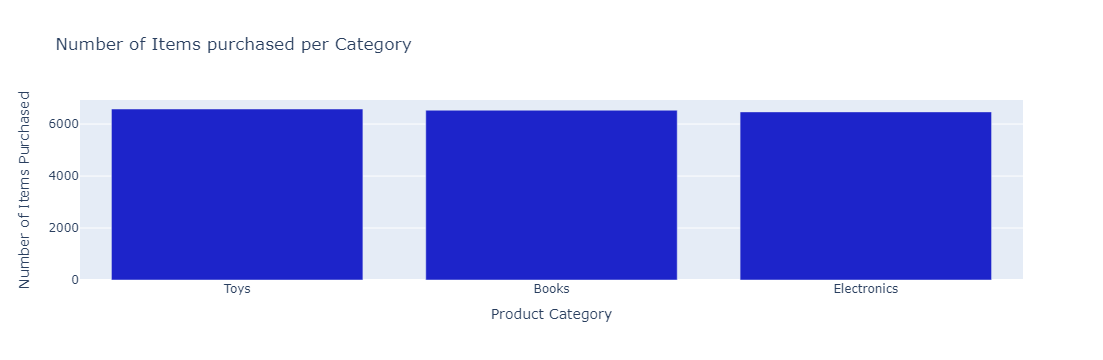

In [19]:
fig = px.bar(
    data_frame=top3_categories,
    x='Product Category',
    y='Number of Items Purchased',
    orientation='v',
    color_discrete_sequence=['#1D24CA'],
    title='Number of Items purchased per Category'
)

fig.show()


### Q4: How many customers are classified as return customers?

In [13]:
return_customer = df[df['Return Customer']==True]
print(f'{return_customer.shape[0]} customers are classified as returned customers.')

4996 customers are classified as returned customers.


### Q5: What is the average review score given by customers?

In [14]:
avg_review_score = df['Review Score (1-5)'].mean()
print(f'Average review score given by the customers is {round(avg_review_score, 3)}')

Average review score given by the customers is 2.995


### Q6: How does the average delivery time vary between subscription statuses (Free, Premium)?

In [15]:
q6_df = df[['Delivery Time (days)', 'Subscription Status']]
q6_df = q6_df[q6_df['Subscription Status'] != "Trial"]
q6_df = q6_df.groupby('Subscription Status').mean().reset_index()
q6_df

,Subscription Status,Delivery Time (days)
0,Free,6.963924
1,Premium,7.070347


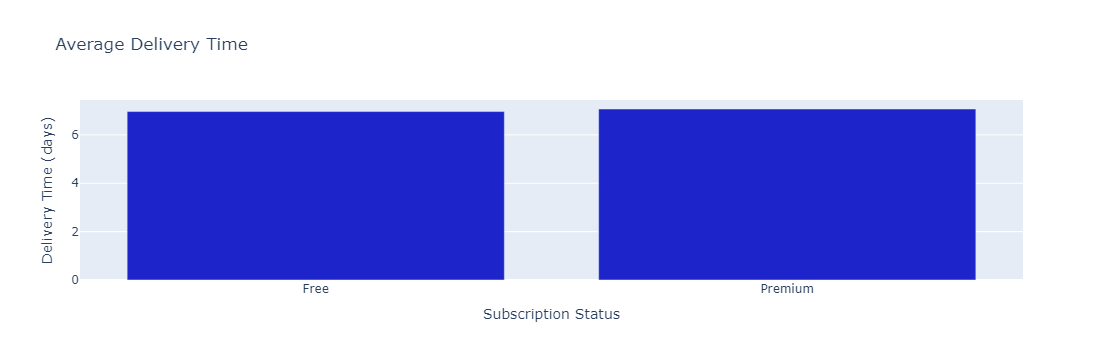

In [20]:
fig = px.bar( 
    data_frame = q6_df,
    y = 'Delivery Time (days)',
    x = "Subscription Status",
    color_discrete_sequence=['#1D24CA'],
    title = "Average Delivery Time"
)

fig.show()

### Q7: How many customers are subscribed to the service?

In [21]:
# We have considered Customers who are at Premium subscription and in trial as Subscribed Customers.

number_of_subscribed_customer = df[df['Subscription Status'] != 'Free']['Customer ID'].count()
print(f"There are {number_of_subscribed_customer} Subscribed Customers. ")

There are 6646 Subscribed Customers. 


### Q8: What percentage of customers used devices to make purchases? (Mobile, Laptop, Tablet)

In [22]:
q8_grp  = df.groupby('Device Type')['Customer ID'].count().reset_index()
q8_grp.rename(columns= {'Customer ID': "Count"}, inplace = True)
q8_grp['Percentage'] = (q8_grp['Count'] / q8_grp['Count'].sum()) * 100
q8_grp[['Device Type', 'Percentage']]

,Device Type,Percentage
0,Desktop,33.48
1,Mobile,33.74
2,Tablet,32.78


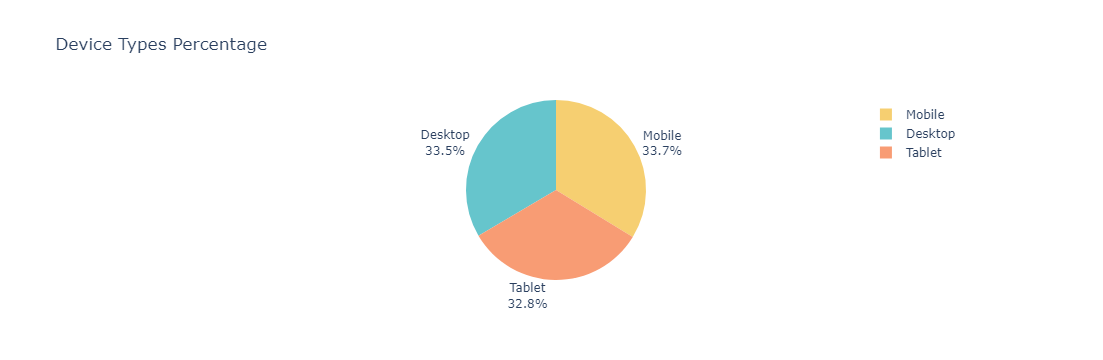

In [23]:
fig = px.pie(
    data_frame = q8_grp,
    values = "Percentage",
    names = "Device Type",
    color = "Device Type",
    title = "Device Types Percentage",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(
    textposition='outside',
    textinfo = 'percent+label'
)
fig.show()

### Q9: What is the average purchase amount for customers who availed discounts compared to those who didn’t?

In [25]:
q9_grp = df.groupby(['Discount Availed'])['Purchase Amount ($)'].mean().reset_index()
q9_grp

,Discount Availed,Purchase Amount ($)
0,False,502.511451
1,True,505.264178


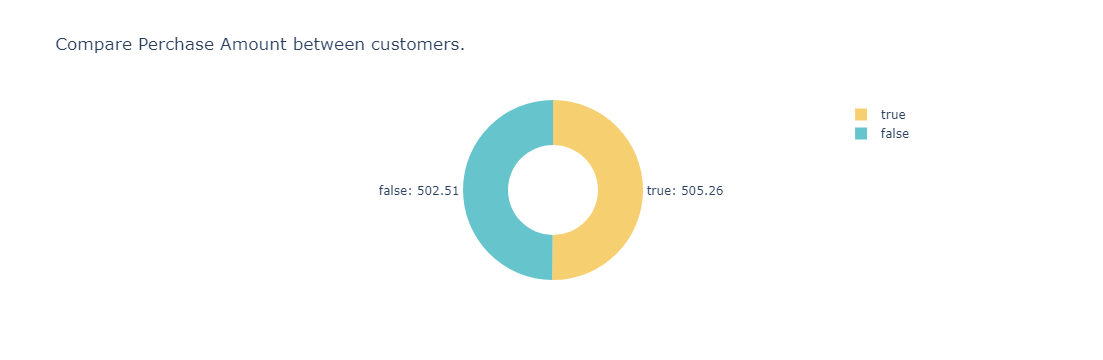

In [26]:
fig = px.pie(
    data_frame = q9_grp,
    values = "Purchase Amount ($)",
    names = "Discount Availed",
    color = "Discount Availed",
    title = "Compare Perchase Amount between customers.",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole = 0.5
)

fig.update_traces(
    textposition='outside',
    textinfo = 'value+label',
    texttemplate='%{label}: %{value:.2f}'
)
fig.show()

### Q10: What is the most common payment method used by customers?

In [27]:
temp_df = df['Payment Method'].value_counts().sort_values(ascending=False).reset_index()
most_common_payment_method = temp_df['Payment Method'].iloc[0]
print(f"The most common payment method is: {most_common_payment_method}.")

The most common payment method is: Bank Transfer.


# <div style="background-color:#161D6F; color:white; padding:25px; font-size:40px; font-family: sans-serif; text-align:center; border-radius:50px;">Level 2: Intermediate Insights</div>

### Q1: What are the average review scores of users of the most common payment method?

In [28]:
most_common_payment_method = str(df['Payment Method'].value_counts()[:1].index[0])
q1_df = df[df['Payment Method'] == most_common_payment_method]
avg_review_score = q1_df['Review Score (1-5)'].mean()
print(f'The average review score of customers whose payment method is bank transfer is {round(avg_review_score,3)}')

The average review score of customers whose payment method is bank transfer is 2.989


### Q2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?

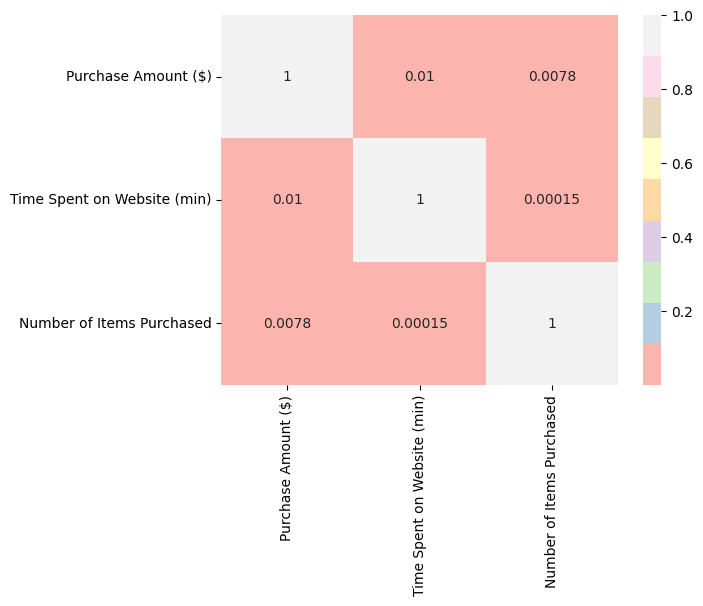

In [20]:
q2_df = df[['Purchase Amount ($)', 'Time Spent on Website (min)', 'Number of Items Purchased']]
corr = q2_df.corr()

#display the correlation plot
sns.heatmap(corr, annot = True, cmap='Pastel1')
plt.show()

In [21]:
correlation_value1 = df['Time Spent on Website (min)'].corr(df['Purchase Amount ($)'])
print(f'The correlation coefficient between time spent on website and purchase amount is {round(correlation_value1,2)}')

correlation_value2 = df['Time Spent on Website (min)'].corr(df['Number of Items Purchased'])
print(f'The correlation coefficient between time spent on website and number of items purchased is {round(correlation_value2,5)}')

The correlation coefficient between time spent on website and purchase amount is 0.01
The correlation coefficient between time spent on website and number of items purchased is 0.00015


**There is a very weak positive relationship between time spent on website and number of items purchased.This suggests that spending more time on the website does not significantly affect the number of items a customer purchases. However, it is important to note that correlation does not imply causation, and other factors may influence purchasing behavior that aren't captured by this simple correlation.**

### Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return customers?

In [30]:
satisfied_return_customer = df[(df['Review Score (1-5)'].isin([4,5])) & (df['Return Customer']==True)]
percentage = (satisfied_return_customer.shape[0]/df.shape[0]) * 100
print(f'The percentage of people who are satisfied (rating of 4 or 5) and also returned customer is {round(percentage,2)}%')

The percentage of people who are satisfied (rating of 4 or 5) and also returned customer is 20.08%


### Q4: What is the relationship between the number of items purchased and customer satisfaction?

Here, number of items purchased is a numerical variable and customer satisfaction is a categorical variable. So first we will check whether number of items purchased is fulfilling the assumption of normality through Shapiro-Wilk test and Q-Q plot. If is does, we will use One-way ANOVA (Analysis Of Variance) otherwise we are gonna use a non-parametric test which is Kruskal-Walis test.

* Hypothesis testing (for normality assumption):

**Null Hypothesis (H₀)**: The data follows a normal distribution.

**Alternative Hypothesis (H₁)**: The data does not follow a normal distribution.

* Hypothesis testing (for relationship):


**Null Hypothesis (H₀)**: There is no significant difference between these groups(high_satisfaction,medium_satisfaction,low_satisfaction).

**Alternative Hypothesis (H₁)**: At least one group is significantly different from the others.

In [23]:
from scipy.stats import shapiro
stat, p_value = shapiro(df['Number of Items Purchased'])
print(f'Statistic: {stat}, P-value: {p_value}')
if p_value > 0.05:
    print("The data is normally distributed (fail to reject H₀).")
else:
    print("The data is not normally distributed (reject H₀).")

Statistic: 0.932154071177207, P-value: 4.4508431539510456e-55
The data is not normally distributed (reject H₀).


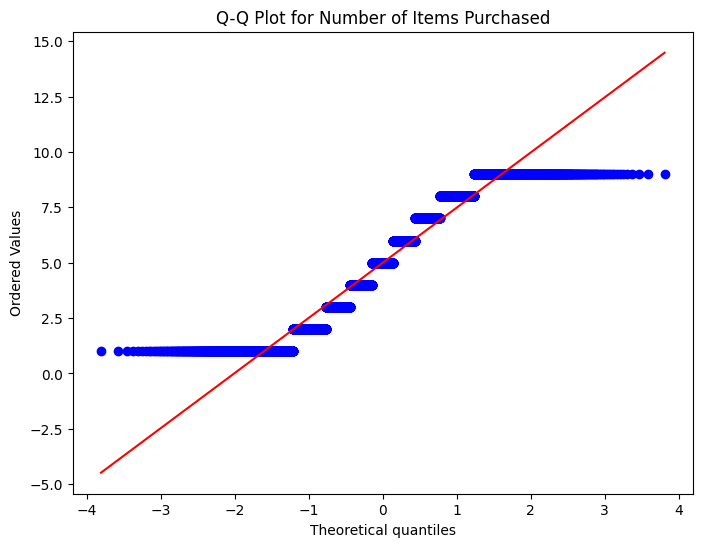

In [24]:
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(df['Number of Items Purchased'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Number of Items Purchased')
plt.show()

**So from Shapiro-Wilk we can see that Number of Items Purchased is not normally distributed.**

In [25]:
from scipy.stats import kruskal
high = df[df['Customer Satisfaction'] == 'High']['Number of Items Purchased']
medium = df[df['Customer Satisfaction'] == 'Medium']['Number of Items Purchased']
low = df[df['Customer Satisfaction'] == 'Low']['Number of Items Purchased']

h_stat, p_value = kruskal(high, medium, low)
print(f"Kruskal-Wallis H-statistic: {round(h_stat,3)}, P-value: {round(p_value,3)}")
if p_value < 0.05:
    print("There is a statistically significant difference between the groups (reject H₀).")
else:
    print("There is no statistically significant difference between the groups (fail to reject H₀).")


Kruskal-Wallis H-statistic: 3.146, P-value: 0.207
There is no statistically significant difference between the groups (fail to reject H₀).


In [32]:
q4_df = df[['Number of Items Purchased', 'Customer Satisfaction']]
satisfaction_map = {'Low': 0, 'Medium': 1, "High": 2}
q4_df['Customer Satisfaction'] = q4_df['Customer Satisfaction'].map(satisfaction_map)

q4_corr = q4_df[['Number of Items Purchased', 'Customer Satisfaction']].corr()
relation = float(q4_corr.loc['Number of Items Purchased', 'Customer Satisfaction'])
print("Relation between the number of items purchased and customer satisfaction:", relation)

Relation between the number of items purchased and customer satisfaction: -0.006424751968698749


**The correlation between the number of items purchased and customer satisfaction is -0.0064, indicating an extremely weak negative relationship. This suggests that the number of items bought has almost no impact on customer satisfaction.**

### Q5: Which location has the 2nd highest average purchase amount?

In [38]:
location_based_purchase_amount = df.groupby('Location')['Purchase Amount ($)'].mean().reset_index().sort_values(by='Purchase Amount ($)', ascending=False)
second_highest_location = location_based_purchase_amount.iloc[1]
print(f"2nd highest location on the basis of highest average purchase amount is {second_highest_location['Location']}.")


2nd highest location on the basis of highest average purchase amount is Barisal.


# <div style="background-color:#161D6F; color:white; padding:25px; font-size:40px; font-family: sans-serif; text-align:center; border-radius:50px;">Level 3: Critical Thinking Insights</div>

### Q1: What factors contribute most to a customer being classified as a return customer?

**In order to do that,first we will check the association by Chi-Squared test between return customer and other categorical variables. We will then perform t-test between return customer and other numerical varaibles.**

In [27]:
from scipy.stats import chi2_contingency

def chi_square_test(cat_var, df):
    contingency_table = pd.crosstab(df['Return Customer'], df[cat_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-Square Test for Return Customer vs {cat_var}:")
    print(f"Chi2 Statistic: {chi2:.4f}, P-value: {p:.4f}, Degrees of Freedom: {dof}")
    
    
    if p < 0.05:
        print("Reject H0: There is a significant association between Return Customer and", cat_var)
    else:
        print("Fail to reject H0: There is no significant association between Return Customer and", cat_var)
    print("\n")

chi_square_test('Location', df)
chi_square_test('Product Category', df)
chi_square_test('Discount Availed', df)
chi_square_test('Subscription Status', df)
chi_square_test('Customer Satisfaction', df)
chi_square_test('Gender',df)

Chi-Square Test for Return Customer vs Location:
Chi2 Statistic: 6.9768, P-value: 0.4313, Degrees of Freedom: 7
Fail to reject H0: There is no significant association between Return Customer and Location


Chi-Square Test for Return Customer vs Product Category:
Chi2 Statistic: 5.3842, P-value: 0.6132, Degrees of Freedom: 7
Fail to reject H0: There is no significant association between Return Customer and Product Category


Chi-Square Test for Return Customer vs Discount Availed:
Chi2 Statistic: 6.1518, P-value: 0.0131, Degrees of Freedom: 1
Reject H0: There is a significant association between Return Customer and Discount Availed


Chi-Square Test for Return Customer vs Subscription Status:
Chi2 Statistic: 0.9879, P-value: 0.6102, Degrees of Freedom: 2
Fail to reject H0: There is no significant association between Return Customer and Subscription Status


Chi-Square Test for Return Customer vs Customer Satisfaction:
Chi2 Statistic: 1.4929, P-value: 0.4741, Degrees of Freedom: 2
Fail t

In [42]:
numeric_columns = [
    'Purchase Amount ($)',
    'Number of Items Purchased',
    'Review Score (1-5)',
    'Delivery Time (days)',
    'Time Spent on Website (min)',
    'Age'
]

return_customers = df[df['Return Customer'] == True]

population_means = df[numeric_columns].mean()

t_test_results = {}
alpha = 0.05 


for column in numeric_columns:
    group = return_customers[column]
    
    if len(group) > 0:
        
        t_stat, p_value = stats.ttest_1samp(group, population_means[column])
        reject_null = p_value < alpha 
        
        t_test_results[column] = {
            't-statistic': t_stat,
            'p-value': p_value,
            'reject_null': reject_null
        }
    else:
        t_test_results[column] = {
            't-statistic': None,
            'p-value': None,
            'reject_null': None,
            'message': 'No data for return customers in this group'
        }


for column, result in t_test_results.items():
    if result['reject_null'] is not None:
        conclusion = "reject the null hypothesis" if result['reject_null'] else "fail to reject the null hypothesis"
        significance = "significant" if result['reject_null'] else "not significant"
        
        print(f"One-sample t-test for Return Customer ({column}):")
        print("t-statistic:", result['t-statistic'], "p-value:", result['p-value'])
        print(f"Conclusion: We {conclusion}. There is  {significance} difference in the average {column.lower()} for return customers compared to the population mean.")
        print("\n")
    else:
        print(f"One-sample t-test for Return Customer ({column}): {result['message']}\n")


One-sample t-test for Return Customer (Purchase Amount ($)):
t-statistic: 0.13683389799645493 p-value: 0.8911676035651778
Conclusion: We fail to reject the null hypothesis. There is  not significant difference in the average purchase amount ($) for return customers compared to the population mean.


One-sample t-test for Return Customer (Number of Items Purchased):
t-statistic: 0.057853902296187185 p-value: 0.9538673163645923
Conclusion: We fail to reject the null hypothesis. There is  not significant difference in the average number of items purchased for return customers compared to the population mean.


One-sample t-test for Return Customer (Review Score (1-5)):
t-statistic: 0.620328049387728 p-value: 0.5350701313114736
Conclusion: We fail to reject the null hypothesis. There is  not significant difference in the average review score (1-5) for return customers compared to the population mean.


One-sample t-test for Return Customer (Delivery Time (days)):
t-statistic: 0.99099797889

### Since We haven't found any significant difference throught Chi-squared test(for categorical variables) and t-test (for numerical variables) so now we will use cross tablulation to check frequency on the basis of returned customers.


In [45]:
returned_customer_df = df[df['Return Customer']==True]

In [47]:
pd.crosstab(returned_customer_df['Return Customer'],returned_customer_df['Location'])

Location,Barisal,Chittagong,Dhaka,Khulna,Mymensingh,Rajshahi,Rangpur,Sylhet
Return Customer,,,,,,,,
True,610,631,603,640,636,637,644,595


In [48]:
pd.crosstab(returned_customer_df['Return Customer'],returned_customer_df['Discount Availed'])

Discount Availed,False,True
Return Customer,,
True,2427,2569


In [49]:
pd.crosstab(returned_customer_df['Return Customer'],returned_customer_df['Customer Satisfaction'])

Customer Satisfaction,High,Low,Medium
Return Customer,,,
True,1622,1694,1680


In [50]:
pd.crosstab(returned_customer_df['Return Customer'],returned_customer_df['Product Category'])

Product Category,Beauty,Books,Clothing,Electronics,Groceries,Home,Sports,Toys
Return Customer,,,,,,,,
True,613,610,666,666,583,630,565,663


In [51]:
pd.crosstab(returned_customer_df['Return Customer'],returned_customer_df['Gender'])

Gender,Female,Male,Other
Return Customer,,,
True,1630,1661,1705


5 most contributing factors are-

1) Location
2) Discount availed
3) Customer satisfaction
4) Product category
5) Gender

### Q2: How do payment methods influence customer satisfaction and return rates?

In [31]:
q2_df = df[['Payment Method', 'Review Score (1-5)', 'Return Customer']]
q2_df['Return Customer'] = q2_df['Return Customer'].map({True: 1, False: 0})

q2_grp = q2_df.groupby(['Payment Method']).agg(
    Avg_Customer_Satisfaction = ("Review Score (1-5)", 'mean'),
    Return_Customer_Rate = ('Return Customer', lambda x: (x.sum()/ len(x)) * 100)
).reset_index()

q2_sorted = q2_grp.sort_values(by=["Return_Customer_Rate", "Avg_Customer_Satisfaction"], ascending= False)
q2_sorted

,Payment Method,Avg_Customer_Satisfaction,Return_Customer_Rate
2,Credit Card,2.970414,51.232742
0,Bank Transfer,2.988873,50.604741
4,PayPal,3.000000,49.869452
3,Debit Card,2.996974,49.117499
1,Cash on Delivery,3.019930,48.928749


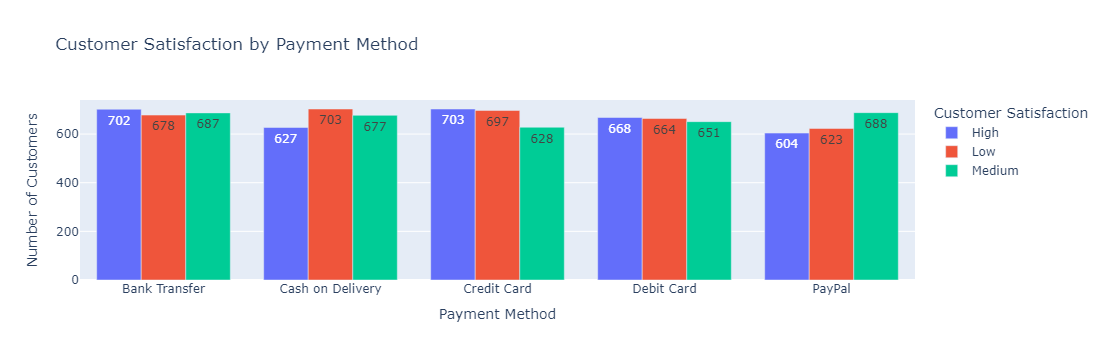

In [52]:
data = df.groupby(['Payment Method', 'Customer Satisfaction']).size().reset_index(name='Counts')
fig = px.bar(data, 
              x='Payment Method', 
              y='Counts', 
              color='Customer Satisfaction', 
              title='Customer Satisfaction by Payment Method',
              labels={'Counts': 'Number of Customers', 'Payment Method': 'Payment Method'},
              text='Counts',  
              barmode='group') 
fig.update_layout(xaxis_title='Payment Method',
                  yaxis_title='Number of Customers',
                  legend_title='Customer Satisfaction')
fig.show()


#### The result obtained shows that payment methods have a noticeable impact on both customer satisfaction and return customer rates. Customers who use Cash on Delivery have the highest average satisfaction score of 3.02 but the lowest return rate at 48.93%, indicating that while they are satisfied, they are less likely to return. On the other hand, Credit Card users have a slightly lower satisfaction score of 2.97 but the highest return rate of 51.23%, suggesting they are more loyal despite lower satisfaction. PayPal users have a balanced profile with an average satisfaction of 3.00 and a moderate return rate of 49.87%. Overall, satisfaction does not perfectly correlate with return rates, as higher satisfaction doesn’t necessarily lead to higher customer loyalty.

### Q3: How does the location influence both purchase amount and delivery time?

In [54]:
location_grp = df.groupby('Location')[['Purchase Amount ($)', 'Delivery Time (days)']].mean().reset_index()
location_grp_order = location_grp.sort_values([ 'Delivery Time (days)' ], ascending = False)
location_grp_order

,Location,Purchase Amount ($),Delivery Time (days)
5,Rajshahi,495.544649,7.113130
4,Mymensingh,507.892211,7.099219
0,Barisal,513.674560,7.072800
6,Rangpur,494.368867,7.031125
1,Chittagong,507.851675,7.020440
7,Sylhet,494.976427,7.018593
2,Dhaka,502.002504,6.941957
3,Khulna,513.937072,6.811774


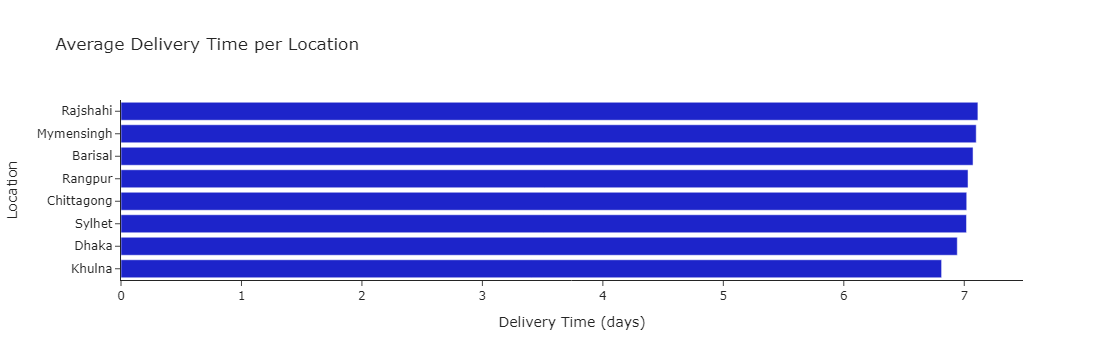

In [56]:
fig = px.bar( 
    data_frame = location_grp_order,
    y = 'Location',
    x = "Delivery Time (days)",
    title = "Average Delivery Time per Location",
    color_discrete_sequence=['#1D24CA'],
    template = "simple_white"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

Khulna reports the highest average purchase amount at $513.94, accompanied by the shortest delivery time of 6.81 days, suggesting that customers in this area are willing to spend more while also receiving their purchases faster. Conversely, Rajshahi shows a high average purchase amount of $495.54, but the delivery time extends to 7.11 days, indicating a trade-off between spending and efficiency. Other locations, such as Mymensingh and Barisal, also demonstrate high purchase amounts ($507.89 and  $513.67, respectively) with delivery times around 7 days, revealing a relatively consistent pattern where higher purchase amounts are associated with slightly longer delivery times. Overall, while locations influence both the amount spent and delivery speed, customers in Khulna seem to benefit from a favorable combination of high spending and prompt service.

### Q4: What major insights are found? Give a proper explanation.

### 1. The age distribution indicates that the customer base is primarily middle-aged.

### 

2. The average review score is 2.995. This score suggests there is room for improvement in customer satisfaction.### 



3.  The correlation between time spent on the website show a very weak positive relationship, that indicates spending more time on the website does not significantly influence purchase behav### ior.



4. Cash on Delivery has the highest average customer satisfaction, whereas Credit Card users reported the lowest satis### faction.



5. Locations affect purchase amounts and delivery times, highlighting the need for businesses to optimize logistics and marketing based on re**gional insights.





# <div style="background-color:#161D6F; color:white; padding:25px; font-size:40px; font-family: sans-serif; text-align:center; border-radius:50px;">Finding Insights on Our Own</div>

# Business Oriented

### Insight 01



#### Q. Find what's the contribution of each product category in generating total revenue? (We have considerd Total Revenue as the sum of total purchase amount)

In [57]:
q1_df = df.groupby('Product Category')['Purchase Amount ($)'].sum().reset_index()
q1_df.rename(columns = {'Purchase Amount ($)': "Total Purchase Amount ($)"}, inplace = True)
q1_df['Percentage'] = (q1_df['Total Purchase Amount ($)'] / sum(q1_df['Total Purchase Amount ($)'])) * 100
q1_df = q1_df.sort_values('Percentage', ascending = False)
q1_df

,Product Category,Total Purchase Amount ($),Percentage
7,Toys,665535.38,13.207884
1,Books,664338.38,13.184129
5,Home,647106.92,12.842162
2,Clothing,646848.53,12.837034
3,Electronics,640727.65,12.715562
4,Groceries,604150.58,11.989672
0,Beauty,603258.30,11.971964
6,Sports,566959.20,11.251591


In [36]:
fig = px.pie(
    data_frame= q1_df,
    values="Percentage",
    names="Product Category",
    color="Product Category",
    title="Percentage of Product Catagory by Purchase Amount ($)",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(
    textposition='outside',
    textinfo='percent+label'
)
fig.show()

The analysis of total revenue reveals the contributions of various product categories in generating income. Toys lead the way with a total purchase amount of $665,535.38, accounting for approximately 13.21% of total revenue, indicating a strong consumer interest in this category. Closely following are Books with $664,338.38 (13.18%) and Home products at $647,106.92 (12.84%), both contributing significantly to the overall revenue. Other notable categories include Clothing ($646,848.53, 12.84%) and Electronics ($640,727.65, 12.72%), showcasing a well-distributed revenue generation across diverse product types. Groceries and Beauty also play essential roles, contributing 11.99% and 11.97%, respectively. Lastly, Sports products represent 11.25% of total revenue. This distribution highlights the importance of multiple categories in driving sales, with a balanced contribution across the board.

### Insight 02

#### Q: Which age group makes the most purchase?

In [59]:
def Classify_age_group(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age <= 27:
        return '18-27'
    elif 28 <= age <= 37:
        return '28-37'
    elif 38 <= age <= 47:
        return '38-47'
    elif 48 <= age <= 57:
        return '48-57'
    elif 58 <= age <= 67:
        return '58-67'
    else:
        return '68+'

df['Age Group'] = df['Age'].apply(Classify_age_group)

q2_df = df.groupby('Age Group')['Purchase Amount ($)'].sum().reset_index()
q2_df.rename(columns = {'Purchase Amount ($)': "Average Purchase Amount ($)"}, inplace=True)
q2_df = q2_df.sort_values("Average Purchase Amount ($)", ascending = False)
q2_df

,Age Group,Average Purchase Amount ($)
3,48-57,1019097.43
4,58-67,993866.22
1,28-37,968312.82
0,18-27,945249.04
2,38-47,921058.26
5,68+,191341.17


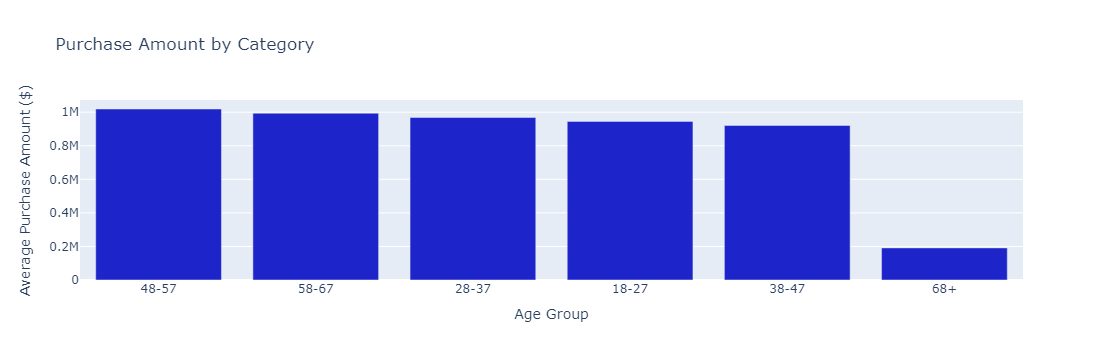

In [60]:
fig = px.bar( 
    data_frame = q2_df,
    x = 'Age Group',
    y = "Average Purchase Amount ($)",
    orientation = "v",
    color_discrete_sequence=['#1D24CA'],
    title = "Purchase Amount by Category"
)

fig.show()

The analysis of average purchase amounts reveals that the 48-57 age group leads in spending, with an impressive average purchase amount of $1,019,097.43. Following closely behind are the 58-67 age group with an average of $993,866.22 and the 28-37 age group at $968,312.82, indicating strong purchasing power among older adults. In contrast, younger age groups, particularly those aged 18-27 and 38-47, show significantly lower average purchases, at $945,249.04 and $921,058.26, respectively. The 68+ age group contributes the least, with an average of only $191,341.17. This data highlights that middle-aged customers are the primary drivers of purchase activity, emphasizing the need for targeted marketing strategies aimed at this demographic to maximize revenue.

### Insight 03

#### Q: What are key elements that drive customer satisfaction?

In [62]:
df.groupby('Customer Satisfaction')['Time Spent on Website (min)'].mean()

Customer Satisfaction
High      29.765738
Low       30.086478
Medium    29.900030
Name: Time Spent on Website (min), dtype: float64

In [63]:
df.groupby('Customer Satisfaction')['Delivery Time (days)'].mean()

Customer Satisfaction
High      6.992736
Low       7.050223
Medium    6.995497
Name: Delivery Time (days), dtype: float64

### Delivery Time



The average delivery time shows minimal variation across different customer satisfaction levels, with low satisfaction customers experiencing slightly longer delivery times. This finding implies that delivery time is important to consider. Addressing delivery delays could enhance the overall customer experience. An ecommerce business should consider implementing more efficient logistics and communication strategies to keep customers informed about their orders, thereby potentially boosting satisfaction even if the delivery time remains consistent.

#### Time Spent on Website





The analysis reveals that customers with high satisfaction levels spend less time on the website than those with low satisfaction. This suggests that efficiency and ease of navigation may enhance customer satisfaction, as longer browsing times could indicate frustration or difficulty in finding desired products. To improve satisfaction, an ecommerce business could focus on optimizing the user experience by streamlining the website design, enhancing search functionalities, and reducing loading times.

###  Returned Customers





We have total  4996  returned customers which is almost half of the total tomer. 



This high number of return customers indicates strong customer loyalty. Strategies to further nurture this segment, such as loyalty programs or targeted marketing, could drive repeat purchases and improve overall revenue.